In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
titanic=pd.read_csv("titanic_passengers.csv")

# Titanic Tabulation

The RMS Titanic was a British ocean liner that unfortunately crashed and sunk in the early 1910s. The story of the Titanic's sinking has become a cultural staple in modern day society, and therefore records of the passangers have well preserved. Here I will be analyzing this data using pandas, and asking some intriguing questions regarding my analysis

### Question 1: What are the average age group of the passangers

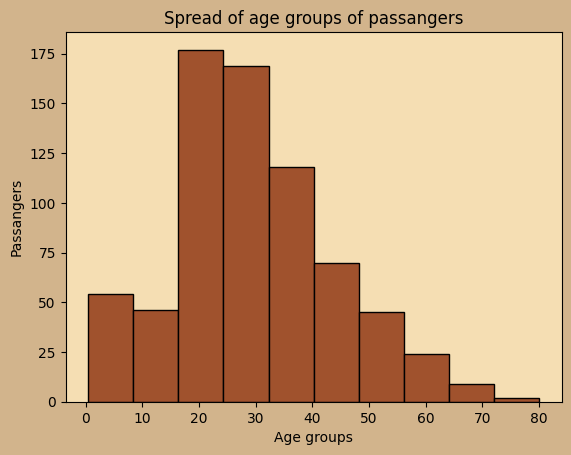

In [2]:
plt.figure(facecolor="tan")
plt.hist((titanic["Age"]),color='sienna', edgecolor='black')
plt.title("Spread of age groups of passangers")
plt.xlabel("Age groups")
plt.ylabel("Passangers")


ax=plt.gca()

ax.set_facecolor("wheat")

To begin, I wanted a general idea of how old the passengers of the Titanic were. Based on the histogram, most passengers were between the age of 20 and 40, relatively young to middle aged people.

### Question 2: How many passangers rode in each class?

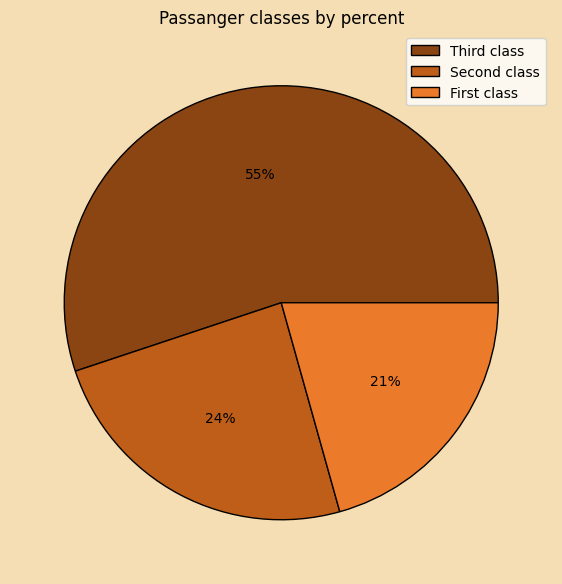

In [3]:
plt.figure(facecolor="wheat", figsize=(7,10))
plt.pie(
    titanic["Pclass"].value_counts(),  
    colors=("#8B4513", "#bf5e19", "#eb7a2a"),
    autopct=('%.0f%%'),
    wedgeprops={"edgecolor" : "black"}
)
plt.title("Passanger classes by percent")
plt.legend(["Third class", "Second class", "First class"])

Next, I wanted to see the amount of passengers who rode in each class. My idea of the Titanic was of a luxury ship full of rich aristocrats and businessmen and women, so it was surprising to see that the majority of all passengers rode in third class.

### Question 3: How many passengers rode with family?

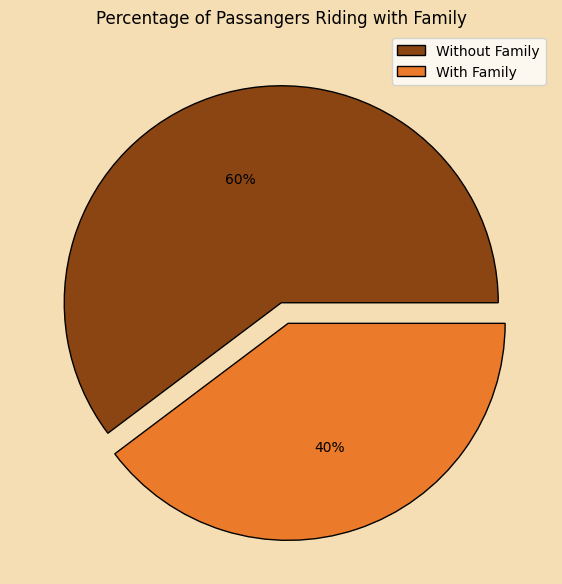

In [4]:
alone=len(titanic[(titanic['SibSp']==0) & (titanic['Parch']==0)])
not_alone=len(titanic[(titanic['SibSp']>0) | (titanic['Parch']>0)])

plt.figure(facecolor="wheat", figsize=(7,10))
plt.pie(
    (alone, not_alone),  
    colors=("#8B4513", "#eb7a2a"),
    autopct=('%.0f%%'),
    wedgeprops={"edgecolor" : "black"},
    explode=(0,0.1)
)
plt.title("Percentage of Passangers Riding with Family")
plt.legend(["Without Family", "With Family"])


The "SipSp" and "Parch" columns piqued my interest, as family trips wasn't something I considered. Likewise I expected most people to be riding alone or with friends, but once again the majority of passengers rode with at least one family member.

### Question 4: Which port of embarkment had the highest survival rate?

<Axes: title={'center': 'Survival Rates by Port (Percent)'}>

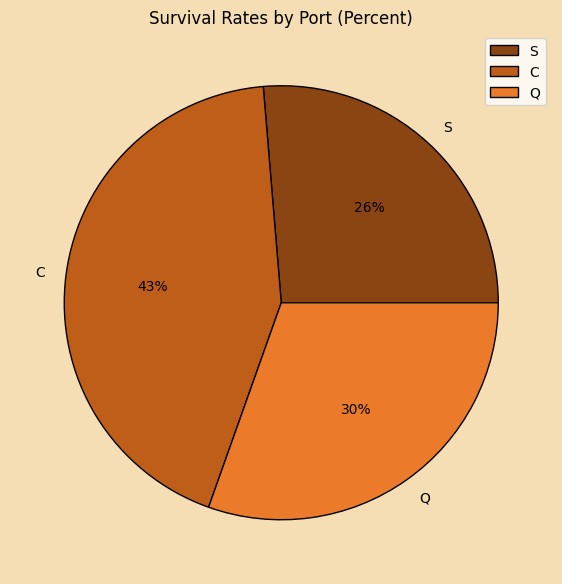

In [6]:
port_surv=titanic[titanic['Survived']==1]
port_surv=port_surv['Embarked'].value_counts()

port_total=titanic['Embarked'].value_counts()

port_percent=port_surv/port_total

plt.figure(facecolor="wheat", figsize=(7,10))
port_percent.plot.pie(
    title="Survival Rates by Port (Percent)",
    legend=("S", "C", "Q"),
    colors=("#8B4513", "#bf5e19", "#eb7a2a"),
    autopct=('%.0f%%'),
    wedgeprops={"edgecolor" : "black"},
    ylabel=""
)

This question was definitely my favorite, I was curious which port statistically had the best odds of survival for the passengers who embarked there. It is important to note that, despite the results shown here, there is not necessarily a correlation between the port of embarkment and survival rate, it could be a coincidence that the "C" port had the most survivals.

### Question 5: What was the most common passenger class of male passengers without a recorded age?

<Axes: title={'center': 'Scope of Passanger Classes of Male Passangers Without Recorded Age'}>

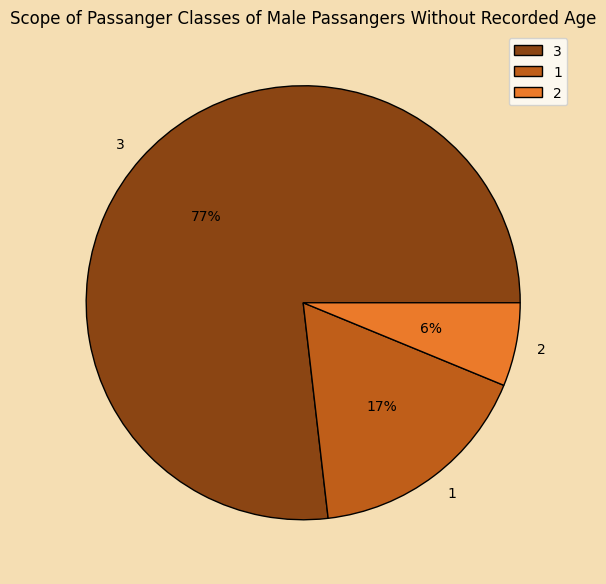

In [33]:
mystery_men=titanic[pd.isna(titanic['Age'])==True]
mystery_men=mystery_men['Pclass'].value_counts()

plt.figure(facecolor="wheat", figsize=(7,10))
mystery_men.plot.pie(
    legend=("Third class", "Second class", "First class"),
    title="Scope of Passanger Classes of Male Passangers Without Recorded Age",
    colors=("#8B4513", "#bf5e19", "#eb7a2a"),
    autopct=('%.0f%%'),
    wedgeprops={"edgecolor" : "black"},
    ylabel=""
)

Finally, a question compounding passenger age (or lackthereof,) sex, and class. The passengers with a lack of age recorded caught my eye, and my initial theory is that these were of high class who, for one reason or another, desired to keep their age anonymous. However, based on the results, I infer that the lack of a recorded age is simply human error, and because there were more third class passengers overall, there were more third class passengers without a recorded age.